<center><h1>
    <font color="blue">Week-3: Predict Titanic survived using logistic Regression</font>  
</h1></center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t_train = pd.read_csv('titanic_train.csv')
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot: >

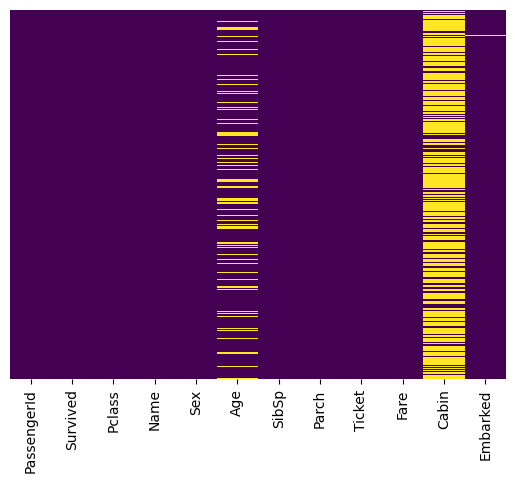

In [3]:
sns.heatmap(t_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: xlabel='Survived', ylabel='count'>

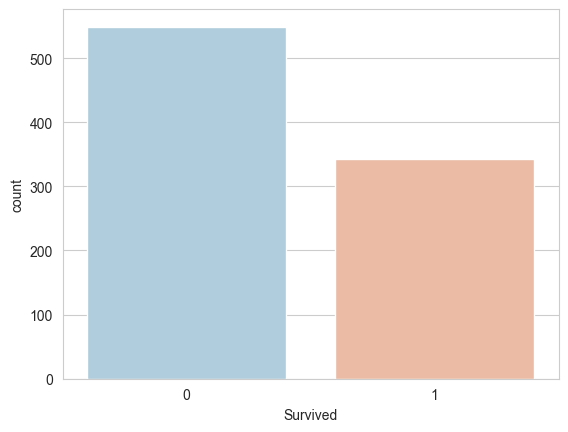

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=t_train,palette='RdBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

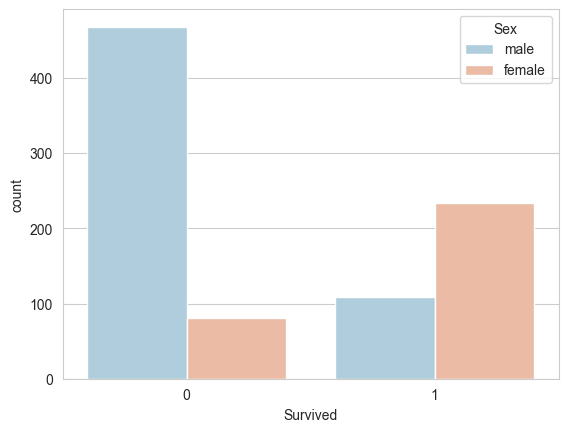

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=t_train,palette='RdBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

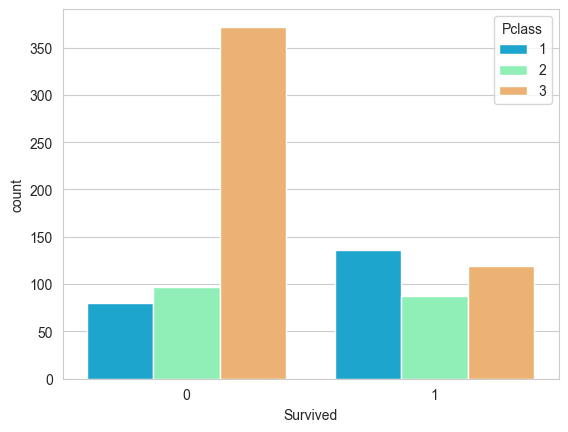

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=t_train,palette='rainbow')

<AxesSubplot: xlabel='Age', ylabel='Count'>

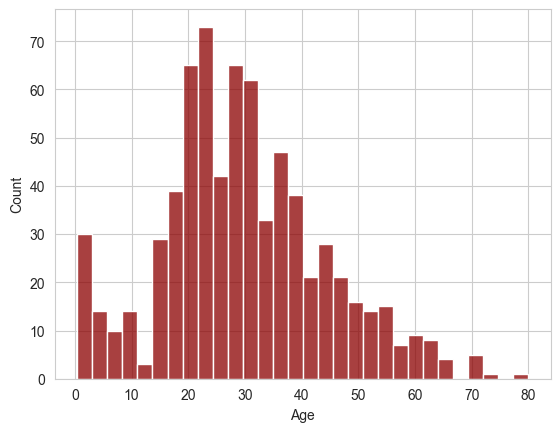

In [7]:
sns.histplot(t_train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot: >

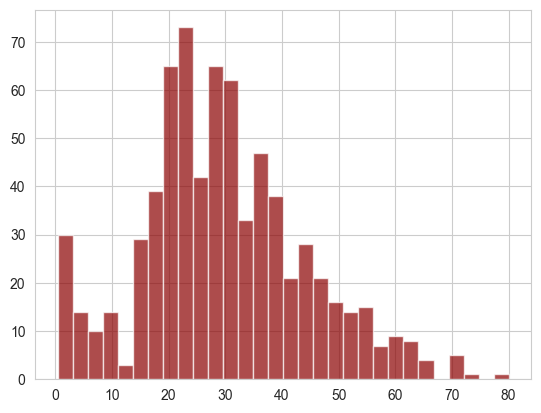

In [8]:
t_train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

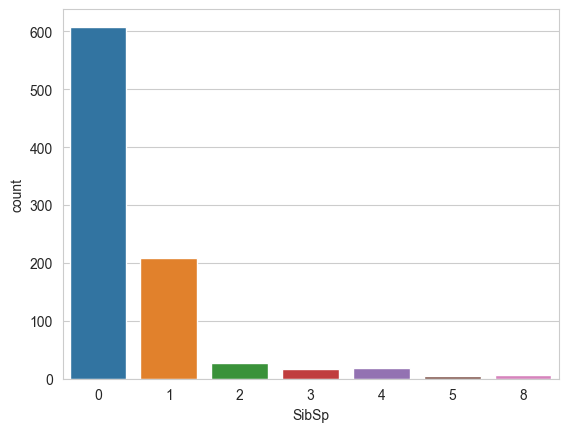

In [9]:
sns.countplot(x='SibSp',data=t_train)

<AxesSubplot: >

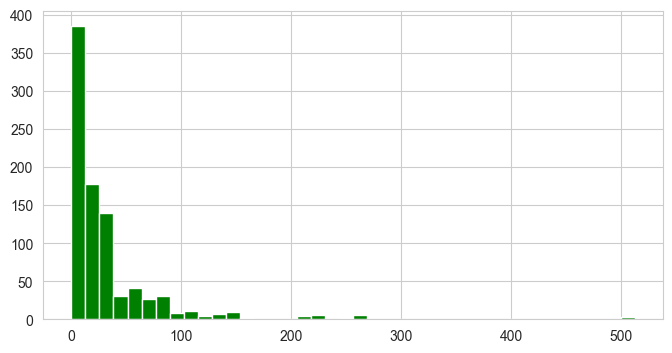

In [10]:
t_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

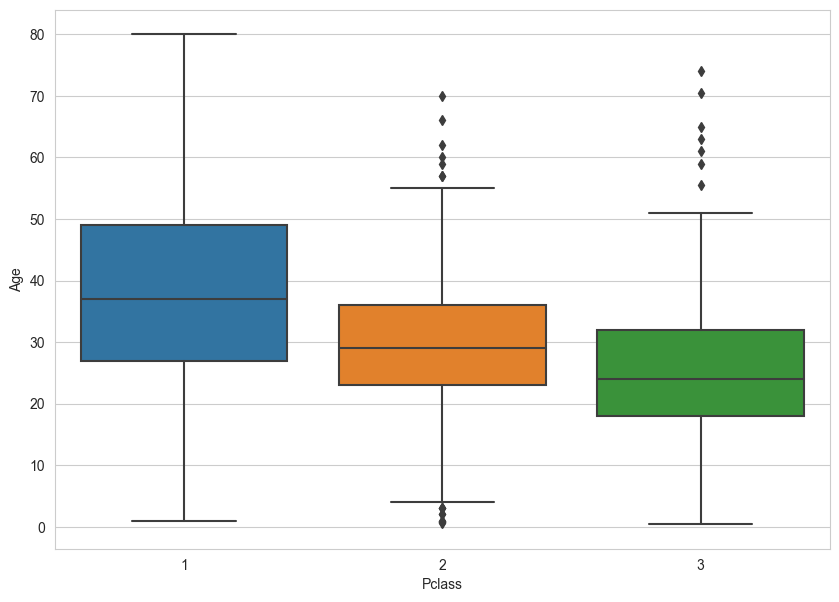

In [11]:
plt.figure(figsize = (10,7))
sns.boxplot(data= t_train, x = "Pclass", y = 'Age')

<AxesSubplot: >

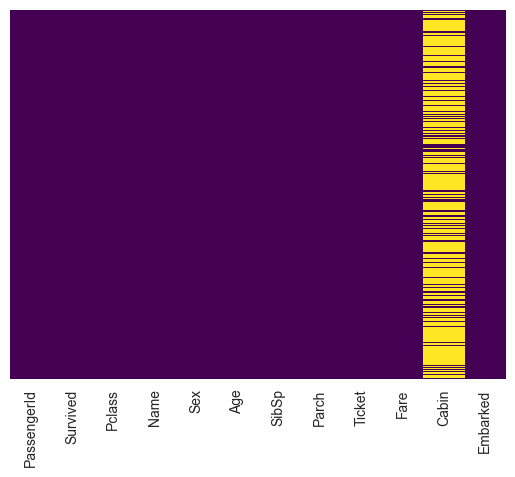

In [12]:
def calc_age(cols):
    Age = cols[0]
    Pclass =  cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

t_train['Age'] = t_train[['Age', 'Pclass']].apply(calc_age, axis = 1)

sns.heatmap(t_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
t_train.drop('Cabin', axis= 1, inplace =True)
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
sex = pd.get_dummies(t_train['Sex'],drop_first=True)

embark = pd.get_dummies(t_train['Embarked'], drop_first=True)

t_train = pd.concat([t_train, sex, embark], axis = 1)
t_train.drop(['Sex', 'Name', 'Embarked', 'Ticket'],axis = 1, inplace = True)
t_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [15]:
from sklearn.model_selection import train_test_split

X = t_train.drop('Survived', axis =1)
y = t_train['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [16]:
print(X_train.shape)
X_train.head()

(623, 9)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,521,1,30.0,0,0,93.5000,0,0,1
510,511,3,29.0,0,0,7.7500,1,1,0
446,447,2,13.0,0,1,19.5000,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,1
691,692,3,4.0,0,1,13.4167,0,0,0


In [17]:
print(y_train.shape)

(623,)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
pred = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[134  20]
 [ 42  72]]


In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

